In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [4]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [5]:
datapath = "/content/drive/MyDrive/Bài tập AIL302m/data.xlsx"

In [6]:
data = pd.read_excel(datapath)

In [7]:
data.head()

,Điện thoại,Màn hình (inch),Camera Chính (MP),Camera Selfie (MP),RAM (GB),Bộ nhớ trong (GB),Tốc độ CPU (gHz),Số nhân GPU,Dung lượng pin (mAh),Số khe sim,Giá tiền (VND)
0,iPhone 12 Pro Max 128GB,6.7,12.0,12.0,6.0,128.0,3.10,4.0,3687,2,30999000
1,OPPO Reno6 Z 5G,6.4,64.0,32.0,8.0,128.0,2.13,3.0,4310,2,9490000
2,iPhone 11 64GB,6.1,12.0,12.0,4.0,64.0,2.65,4.0,3110,2,15999000
3,Xiaomi POCO X3 Pro NFC 8GB-256GB,6.6,48.0,20.0,8.0,256.0,2.96,2.0,5160,2,7290000
4,Nokia C30 3GB-32GB,6.8,13.0,5.0,3.0,32.0,1.60,2.0,6000,2,2790000


In [8]:
data.shape

(283, 11)

In [9]:
data.dtypes

Điện thoại               object
Màn hình (inch)         float64
Camera Chính (MP)       float64
Camera Selfie (MP)      float64
RAM (GB)                float64
Bộ nhớ trong (GB)       float64
Tốc độ CPU (gHz)        float64
Số nhân GPU             float64
Dung lượng pin (mAh)      int64
Số khe sim                int64
Giá tiền (VND)            int64
dtype: object

In [10]:
data = data.drop(['Điện thoại'], axis = 1)
data.head()

,Màn hình (inch),Camera Chính (MP),Camera Selfie (MP),RAM (GB),Bộ nhớ trong (GB),Tốc độ CPU (gHz),Số nhân GPU,Dung lượng pin (mAh),Số khe sim,Giá tiền (VND)
0,6.7,12.0,12.0,6.0,128.0,3.10,4.0,3687,2,30999000
1,6.4,64.0,32.0,8.0,128.0,2.13,3.0,4310,2,9490000
2,6.1,12.0,12.0,4.0,64.0,2.65,4.0,3110,2,15999000
3,6.6,48.0,20.0,8.0,256.0,2.96,2.0,5160,2,7290000
4,6.8,13.0,5.0,3.0,32.0,1.60,2.0,6000,2,2790000


In [11]:
data.isnull().sum()

Màn hình (inch)          0
Camera Chính (MP)        2
Camera Selfie (MP)      13
RAM (GB)                 0
Bộ nhớ trong (GB)        0
Tốc độ CPU (gHz)         0
Số nhân GPU             14
Dung lượng pin (mAh)     0
Số khe sim               0
Giá tiền (VND)           0
dtype: int64

In [12]:
data = data.fillna(0)
data.isnull().sum()

Màn hình (inch)         0
Camera Chính (MP)       0
Camera Selfie (MP)      0
RAM (GB)                0
Bộ nhớ trong (GB)       0
Tốc độ CPU (gHz)        0
Số nhân GPU             0
Dung lượng pin (mAh)    0
Số khe sim              0
Giá tiền (VND)          0
dtype: int64

In [13]:
def exploring_stats2(pdf_input):
    # check rows, cols
    total_records = pdf_input.shape[0]
    total_columns = pdf_input.shape[1]
    print("Total records:", total_records)
    print("Total columns:", total_columns)

    # check dtypes
    name = []
    sub_type = []
    for n, t in pdf_input.dtypes.iteritems():
        name.append(n)
        sub_type.append(t)

    # check distinct
    ls_ndist = []
    for cname in pdf_input.columns:
        ndist = pdf_input[cname].nunique()
        pct_dist = ndist * 100.0 / total_records
        ls_ndist.append("{} ({:0.2f}%)".format(ndist, pct_dist))

    # check missing
    ls_nmiss = []
    for cname in pdf_input.columns:
        nmiss = pdf_input[cname].isnull().sum()
        pct_miss = nmiss * 100.0 / total_records
        ls_nmiss.append("{} ({:0.2f}%)".format(nmiss, pct_miss))

    # check zeros
    ls_zeros = []
    for cname in pdf_input.columns:
        try:
            nzeros = (pdf_input[cname] == 0).sum()
            pct_zeros = nzeros * 100.0 / total_records
            ls_zeros.append("{} ({:0.2f}%)".format(nzeros, pct_zeros))
        except:
            ls_zeros.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # check negative
    ls_neg = []
    for cname in pdf_input.columns:
        try:
            nneg = (pdf_input[cname].astype("float") < 0).sum()
            pct_neg = nneg * 100.0 / total_records
            ls_neg.append("{} ({:0.2f}%)".format(nneg, pct_neg))
        except:
            ls_neg.append("{} ({:0.2f}%)".format(0, 0))
            continue

    # prepare output
    data = {
        "name": name,
        "sub_type": sub_type,
        "n_distinct": ls_ndist,
        "n_miss": ls_nmiss,
        "n_zeros": ls_zeros,
        "n_negative": ls_neg,
    }

    # check stats
    pdf_stats = pdf_input.describe().transpose()
    ls_stats = []
    for stat in pdf_stats.columns:
        data[stat] = []
        for cname in pdf_input.columns:
            try:
                data[stat].append(pdf_stats.loc[cname, stat])
            except:
                data[stat].append(0.0)

    # take samples
    nsample = 10
    pdf_sample = pdf_input.sample(frac=.5).head(nsample).transpose()
    pdf_sample.columns = ["sample_{}".format(i) for i in range(nsample)]

    # output
    col_ordered = ["sub_type", "n_distinct", "n_miss", "n_negative", "n_zeros",
                   "25%", "50%", "75%", "count", "max", "mean", "min", "std"] + list(pdf_sample.columns)
    pdf_data = pd.DataFrame(data).set_index("name")
    pdf_data = pd.concat([pdf_data, pdf_sample], axis=1)
    pdf_data = pdf_data[col_ordered]

    return pdf_data
exploring_stats2(data)

Total records: 283
Total columns: 10


,sub_type,n_distinct,n_miss,n_negative,n_zeros,25%,50%,75%,count,max,mean,min,std,sample_0,sample_1,sample_2,sample_3,sample_4,sample_5,sample_6,sample_7,sample_8,sample_9
name,,,,,,,,,,,,,,,,,,,,,,,
Màn hình (inch),float64,67 (23.67%),0 (0.00%),0 (0.00%),0 (0.00%),5.7,6.43,6.6,283.0,11.0,6.090813e+00,1.800,1.264749e+00,6.67,4.5,6.76,6.6,5.46,6.55,5.5,1.800,5.2,6.5
Camera Chính (MP),float64,22 (7.77%),0 (0.00%),0 (0.00%),2 (0.71%),12.0,16.00,49.0,283.0,108.0,3.025788e+01,0.000,2.639816e+01,48.00,12.0,50.00,64.0,19.00,64.00,12.0,0.080,13.0,13.0
Camera Selfie (MP),float64,18 (6.36%),0 (0.00%),0 (0.00%),13 (4.59%),5.0,8.00,16.0,283.0,44.0,1.119435e+01,0.000,9.061569e+00,8.00,8.0,13.00,16.0,13.00,20.00,8.0,0.000,5.0,5.0
RAM (GB),float64,14 (4.95%),0 (0.00%),0 (0.00%),0 (0.00%),3.0,4.00,8.0,283.0,16.0,5.144346e+00,0.004,3.095865e+00,4.00,3.0,12.00,6.0,4.00,8.00,4.0,0.048,2.0,2.0
Bộ nhớ trong (GB),float64,13 (4.59%),0 (0.00%),0 (0.00%),0 (0.00%),32.0,64.00,128.0,283.0,512.0,9.736311e+01,0.004,8.518455e+01,128.00,32.0,512.00,128.0,64.00,128.00,32.0,0.128,16.0,32.0
Tốc độ CPU (gHz),float64,42 (14.84%),0 (0.00%),0 (0.00%),0 (0.00%),1.8,2.20,2.5,283.0,3.2,2.146855e+00,0.800,5.561357e-01,2.00,2.0,2.99,2.2,2.45,2.40,2.0,1.000,1.3,2.3
Số nhân GPU,float64,12 (4.24%),0 (0.00%),0 (0.00%),14 (4.95%),2.0,2.00,3.0,283.0,16.0,2.819788e+00,0.000,2.473841e+00,4.00,2.0,3.00,2.0,2.00,2.00,2.0,0.000,2.0,2.0
Dung lượng pin (mAh),int64,85 (30.04%),0 (0.00%),0 (0.00%),0 (0.00%),3125.0,4000.00,4750.0,283.0,7250.0,3.884731e+03,800.000,1.145341e+03,5000.00,3500.0,4600.00,4820.0,3230.00,4250.00,4000.0,1020.000,3700.0,5000.0
Số khe sim,int64,2 (0.71%),0 (0.00%),0 (0.00%),0 (0.00%),1.0,2.00,2.0,283.0,2.0,1.710247e+00,1.000,4.544511e-01,2.00,1.0,2.00,2.0,1.00,2.00,1.0,2.000,2.0,2.0


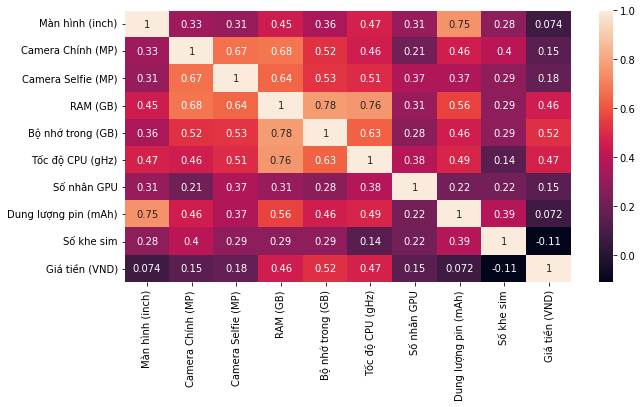

In [15]:
fig, ax = plt.subplots(figsize=(10,5)) 
sns.heatmap(data.corr(), annot=True)

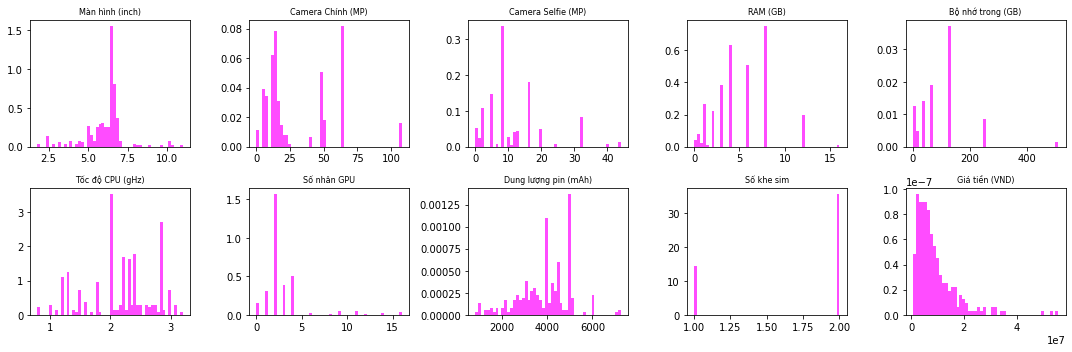

In [17]:
fig, axes = plt.subplots(2, 5, figsize=(15, 5))
ax = axes.ravel() 
for i in range(10):
  ax[i].hist(data[data.columns[i]], bins=50, density=True, alpha=0.7, color='magenta')
  ax[i].set_title(data.columns[i], fontsize=8)
plt.tight_layout()  